<a href="https://colab.research.google.com/github/soymlk94/datavis_sp24/blob/main/PS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

P3 (Cervical Cancer & Inequity in NJ) - Where you live and who you are still matter when it comes to cervical cancer risk — and we can see it clearly in the gaps in screening, outcomes, and access.



In the notebook:
You’ll back this up with:

Correlations: e.g., screening rate vs. uninsurance, death rate vs. poverty

Outliers/edge cases: e.g., counties with good outcomes despite high poverty—what’s working there?

Sensitivity checks (e.g., exclude years with incomplete data, normalize rates)

All Data is from thee New Jersey Department of Public Health - New Jersey State Health Assessment Data

In [8]:
# Cervical Cancer & Health Equity in New Jersey
# Storytelling Notebook (Google Colab Compatible)

import pandas as pd
import matplotlib.pyplot as plt

# === Load files from Google Drive share links ===
file_links = {
    "Cervical_Cancer_Data": "https://docs.google.com/uc?id=1CmNGDUG_44O4p-jLZFnIsc3Yd9abMptm&export=download",
    "Socioeconomic_Health_Data": "https://docs.google.com/uc?id=1vmR6MEpGrImLIk_9YxzZ3s_ZoyFEaz3-&export=download"
}



In [10]:
# Load specific sheets from each Excel file
datasets = {}

# Cervical cancer data
datasets["Incidence_Race"] = pd.read_excel(file_links["Cervical_Cancer_Data"], sheet_name="Incidence_Race_2010-2020")
datasets["Deaths_by_Race"] = pd.read_excel(file_links["Cervical_Cancer_Data"], sheet_name="Deaths_by_Race_2000-2020")
datasets["Screening_by_Race"] = pd.read_excel(file_links["Cervical_Cancer_Data"], sheet_name="Screening_by_Race_2012-2020")
datasets["Screening_by_County"] = pd.read_excel(file_links["Cervical_Cancer_Data"], sheet_name="Screening_by_County_2017-2020")

# Socioeconomic health data
datasets["Uninsured_by_County"] = pd.read_excel(file_links["Socioeconomic_Health_Data"], sheet_name="Uninsured_By_County_2022")
datasets["Poverty_by_Race"] = pd.read_excel(file_links["Socioeconomic_Health_Data"], sheet_name="Poverty_By_Race_2010-2023")
datasets["Income_Inequality"] = pd.read_excel(file_links["Socioeconomic_Health_Data"], sheet_name="Income_Inequality_2023")

Start with Cervical Cancer Outcomes (Graph 1)
From Deaths_by_Race_2000-2020: Show persistent racial disparities in cervical cancer deaths.

Line graph of death rates over time by race — highlight that Black and Hispanic women die at higher rates than White and Asian women, even in recent years.



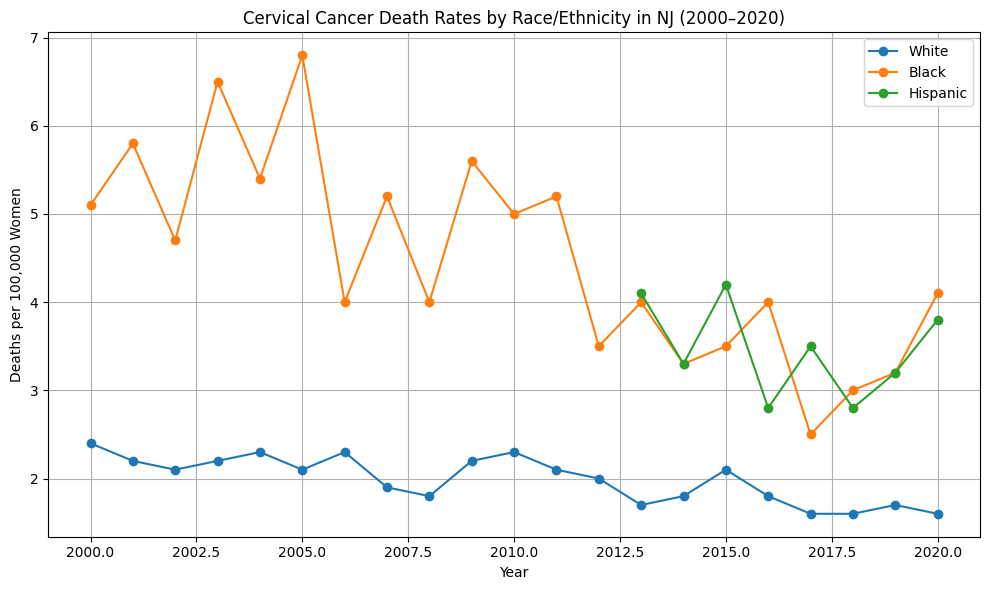

In [11]:
# === Graph 1: Cervical Cancer Death Rates by Race ===
df1 = datasets["Deaths_by_Race"]
plt.figure(figsize=(10,6))
for race in ["White", "Black", "Hispanic"]:
    plt.plot(df1["Year"], df1[race], label=race, marker='o')
plt.title("Cervical Cancer Death Rates by Race/Ethnicity in NJ (2000–2020)")
plt.xlabel("Year"); plt.ylabel("Deaths per 100,000 Women")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

Cervical Cancer Death Rates by Race/Ethnicity in New Jersey (2000–2020)

Key message:
Despite overall declines, Black and Hispanic women continue to die from cervical cancer at rates nearly double those of White women — revealing a persistent racial health gap over two decades.





Then Look at Screening Rates (Graph 2 & 3)
From Screening_by_Race_2012-2020: Line plot by race.

From Screening_by_County_2017-2020: Bar chart to show geographic disparities.

 Point: Lower screening among Hispanic women & some counties correlate with worse outcomes.

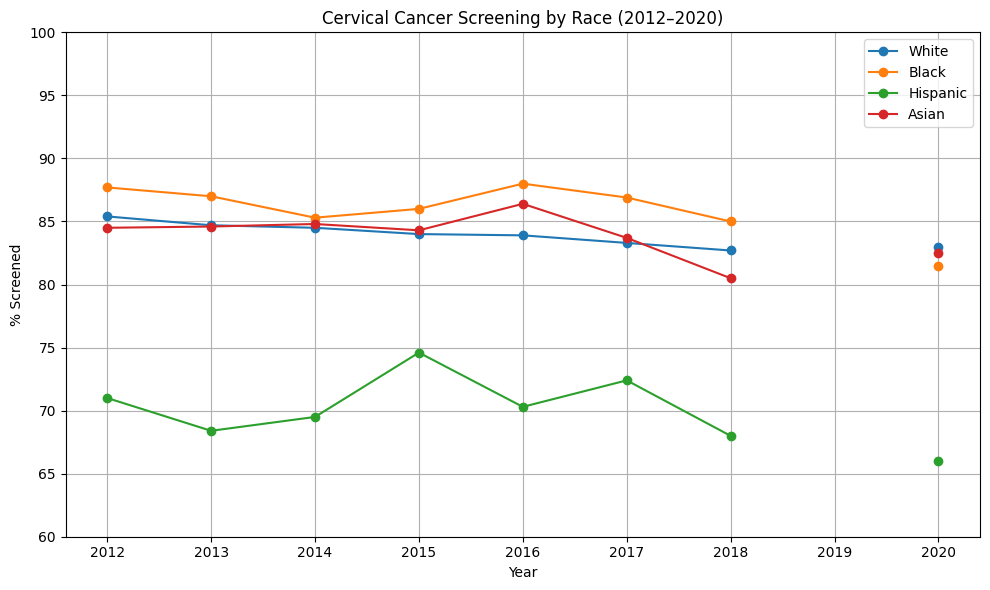

In [13]:
# === Graph 2: Screening by Race ===
df2 = datasets["Screening_by_Race"]
plt.figure(figsize=(10,6))
for race in ["White", "Black", "Hispanic", "Asian"]:
    plt.plot(df2["Year"], df2[race], label=race, marker='o')
plt.title("Cervical Cancer Screening by Race (2012–2020)")
plt.xlabel("Year"); plt.ylabel("% Screened")
plt.ylim(60, 100); plt.legend(); plt.grid(True)
plt.tight_layout(); plt.show()

Key takeaway:

While screening rates declined slightly for all groups, Hispanic women consistently have the lowest screening rates — often 15–20 percentage points below Black and White women. This gap likely contributes to their higher cervical cancer death rates seen earlier.



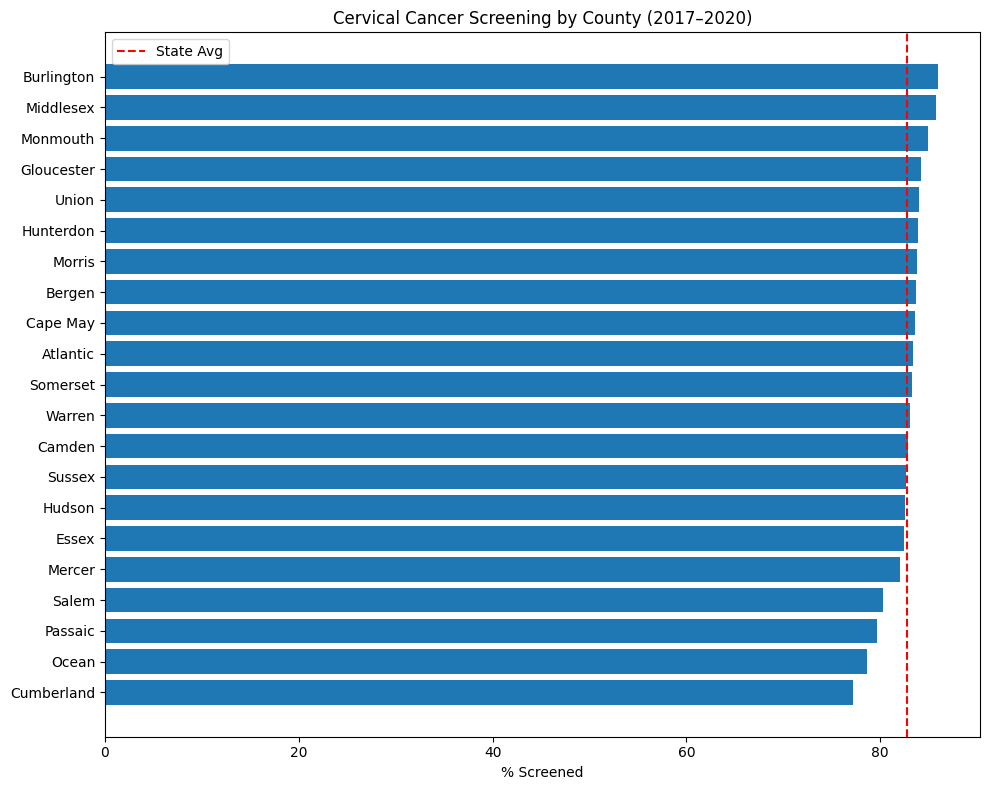

In [14]:
# === Graph 3: Screening by County ===
df3 = datasets["Screening_by_County"]
df3_sorted = df3.sort_values("Estimated % (2017–2020)")
plt.figure(figsize=(10,8))
plt.barh(df3_sorted["County"], df3_sorted["Estimated % (2017–2020)"])
plt.axvline(df3_sorted["Estimated % (2017–2020)"].mean(), color='red', linestyle='--', label='State Avg')
plt.title("Cervical Cancer Screening by County (2017–2020)")
plt.xlabel("% Screened")
plt.legend(); plt.tight_layout(); plt.show()

Insight:

There’s a wide spread in screening rates across counties. Cumberland, Ocean, and Passaic are below the state average — echoing the disparities we saw by race. These lower-screening counties may be key targets for focused public health intervention.


Introduce Access & Inequality (Graph 4 & 5)
From Uninsured_By_County_2022: Bar chart — counties with higher uninsured rates.

From Income_Inequality_2023: Bar chart — compare with above.

Insight: Counties with high uninsurance + inequality often have lower screening & higher death rates.

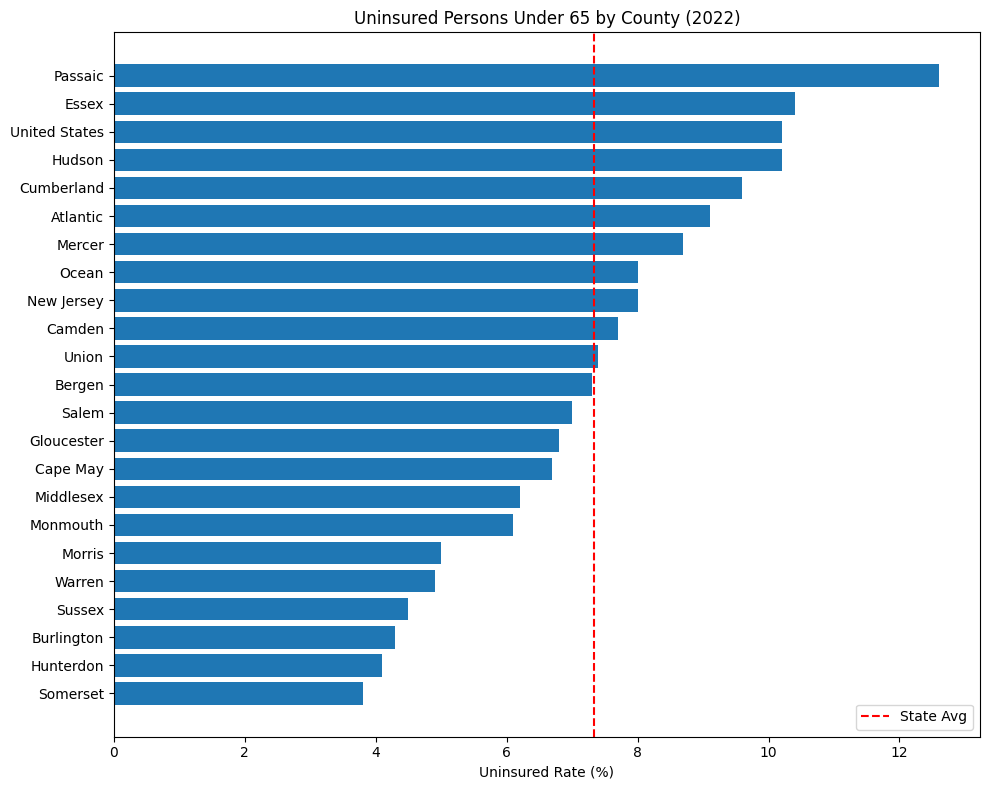

In [15]:
# === Graph 4: Uninsured by County ===
df4 = datasets["Uninsured_by_County"]
df4_sorted = df4.sort_values("Uninsured % (2022)")
plt.figure(figsize=(10,8))
plt.barh(df4_sorted["County"], df4_sorted["Uninsured % (2022)"])
plt.axvline(df4_sorted["Uninsured % (2022)"].mean(), color='red', linestyle='--', label='State Avg')
plt.title("Uninsured Persons Under 65 by County (2022)")
plt.xlabel("Uninsured Rate (%)")
plt.legend(); plt.tight_layout(); plt.show()

Big reveal:

Counties like Passaic, Essex, Hudson, and Cumberland — all with high uninsured rates — also show up earlier with low screening rates and worse cervical cancer outcomes. These gaps in coverage are likely contributing directly to inequities in prevention and survival.

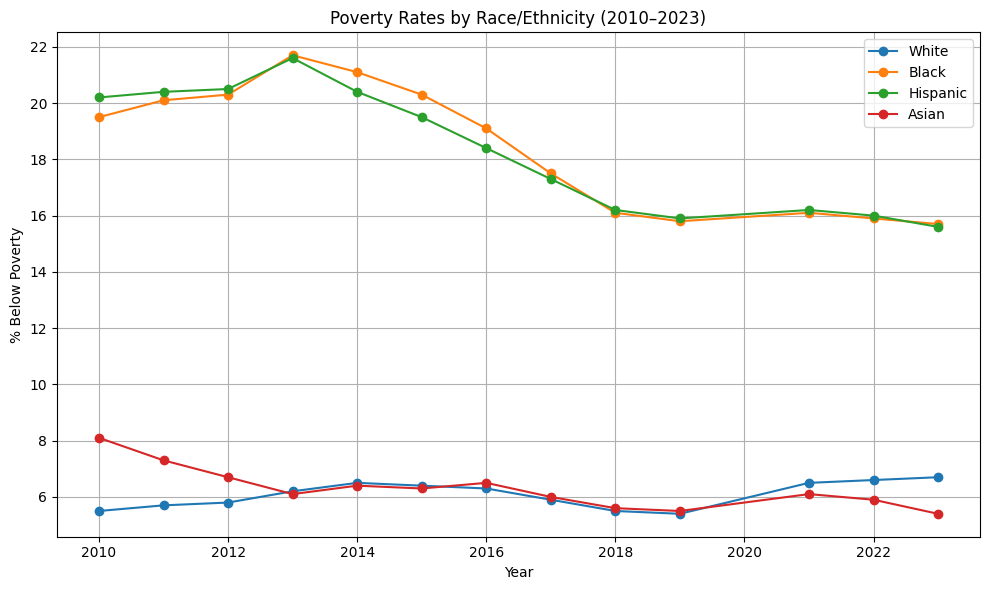

In [16]:
# === Graph 5: Poverty by Race ===
df5 = datasets["Poverty_by_Race"]
plt.figure(figsize=(10,6))
for race in ["White", "Black", "Hispanic", "Asian"]:
    plt.plot(df5["Year"], df5[race], label=race, marker='o')
plt.title("Poverty Rates by Race/Ethnicity (2010–2023)")
plt.xlabel("Year"); plt.ylabel("% Below Poverty")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

Poverty Rates by Race/Ethnicity in NJ (2010–2023)

Key insight:
Poverty rates have declined across the board, but Black and Hispanic populations remain over 2.5× more likely to live in poverty than White and Asian populations. These long-standing socioeconomic gaps help explain persistent disparities in screening and cancer outcomes.

Connect Socioeconomic Factors to Health (Graph 6)
From Poverty_By_Race_2010-2023: Dot Plot – Income Inequality by County in NJ (2023)

Overlay or annotate to show how structural disadvantages align with health disparities.

The Gini index, or Gini coefficient, is a statistical measure used to quantify the degree of inequality in the distribution of income or wealth within a population, ranging from 0 (perfect equality) to 1 (perfect inequality

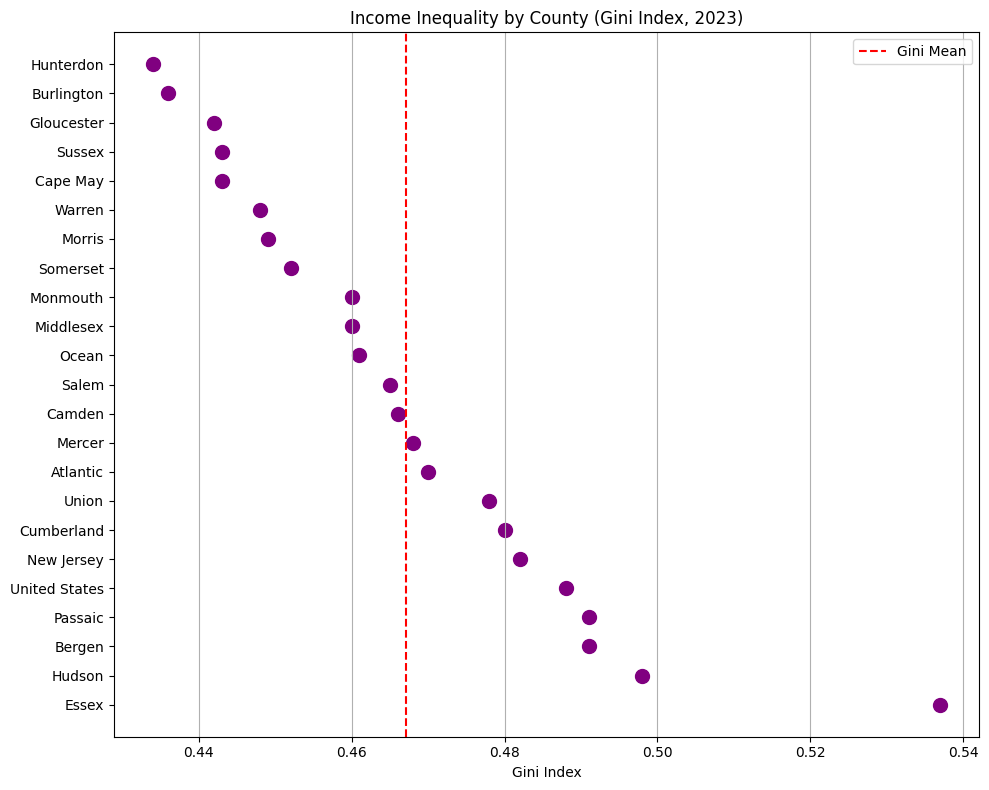

In [18]:
# === Graph 6: Income Inequality (Dot Plot) ===
df6 = datasets["Income_Inequality"]
df6_sorted = df6.sort_values("Gini Index (2023)", ascending=False)
plt.figure(figsize=(10,8))
plt.scatter(df6_sorted["Gini Index (2023)"], df6_sorted["County"], s=100, color='purple')
plt.axvline(df6_sorted["Gini Index (2023)"].mean(), color='red', linestyle='--', label='Gini Mean')
plt.title("Income Inequality by County (Gini Index, 2023)")
plt.xlabel("Gini Index")
plt.grid(axis='x'); plt.legend(); plt.tight_layout(); plt.show()


Insight:

Counties like Essex, Hudson, Passaic, and Bergen show the highest income inequality, and notably, they also rank high in uninsurance and low screening — reinforcing the structural barriers that drive poor cervical cancer outcomes.



Story Reflection - Cervical Cancer & Inequity in NJ

Despite advances in prevention, cervical cancer continues to disproportionately affect women of color in New Jersey. Death rates among Black and Hispanic women remain significantly higher than for White or Asian women — a gap that has persisted over the last two decades. The reason? Lower screening rates and barriers to access. Hispanic women consistently have the lowest self-reported screening coverage, and several counties with high proportions of uninsured residents — including Passaic, Essex, and Cumberland — show both low screening and poor outcomes.

Zooming out, the disparities reflect deeper structural issues. Counties with the highest income inequality and poverty, particularly among Black and Hispanic communities, align with the worst health metrics. This story isn’t just about cancer — it’s about how race, place, and poverty still shape who gets care, who gets screened, and who survives. The data points to a clear call for targeted, place-based equity interventions.

